In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("Housing.csv")

In [84]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [86]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [87]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='mainroad', ylabel='count'>

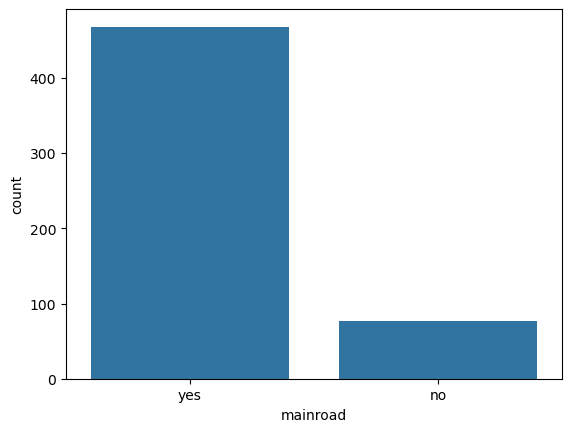

In [88]:
sns.countplot(df, x='mainroad')

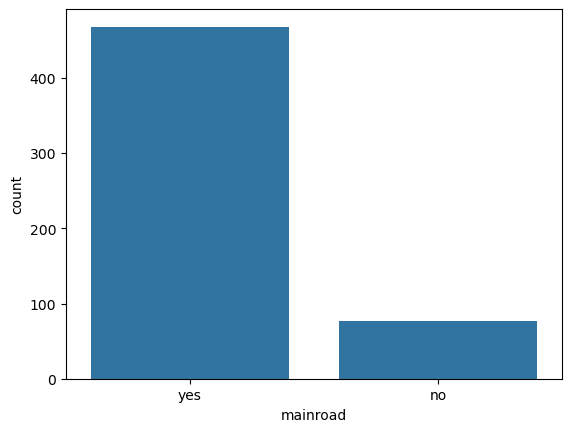

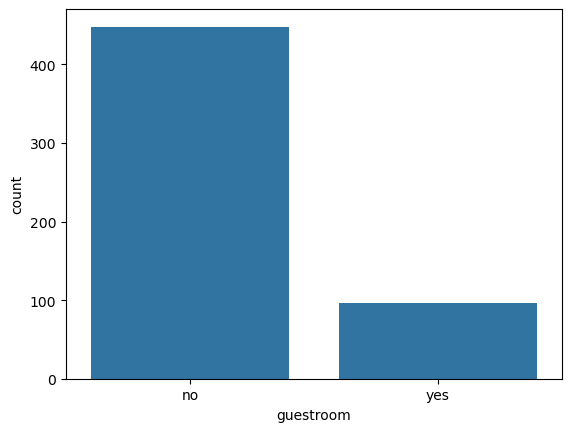

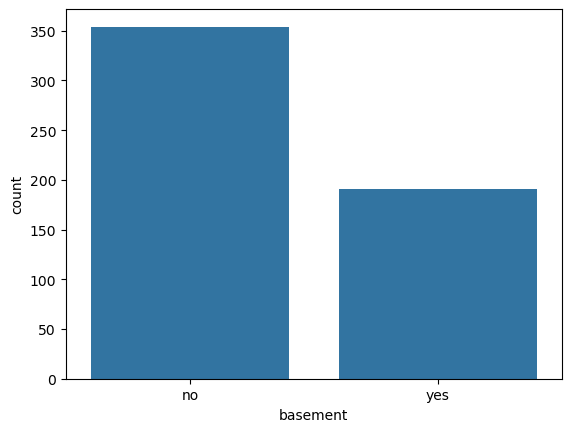

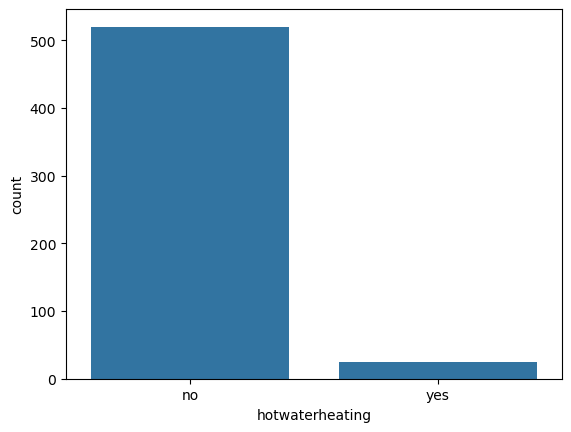

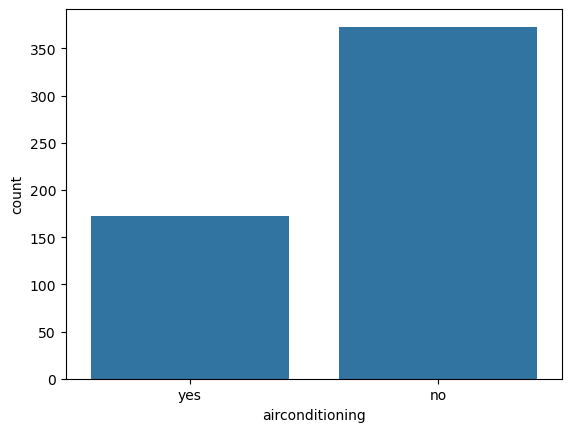

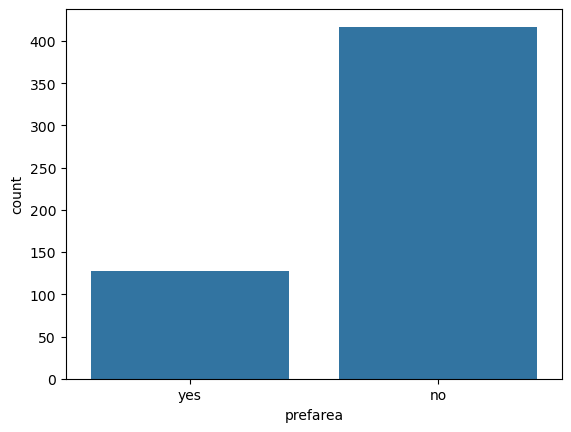

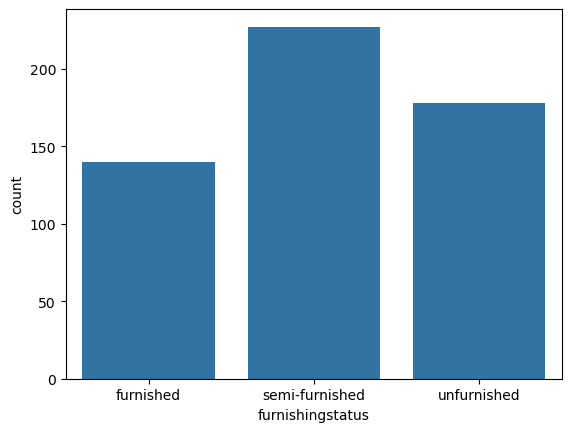

In [89]:
# Plotting countplot for all categorical columns
for i in df.select_dtypes(include='object').columns:
    sns.countplot(df,x=i)
    plt.show()

In [90]:
for i in df.select_dtypes(include='number').columns:
    print(i,df[i].corr(df['price']))

price 1.0
area 0.5359973457780797
bedrooms 0.36649402577386875
bathrooms 0.5175453394550112
stories 0.42071236618861657
parking 0.38439364863572595


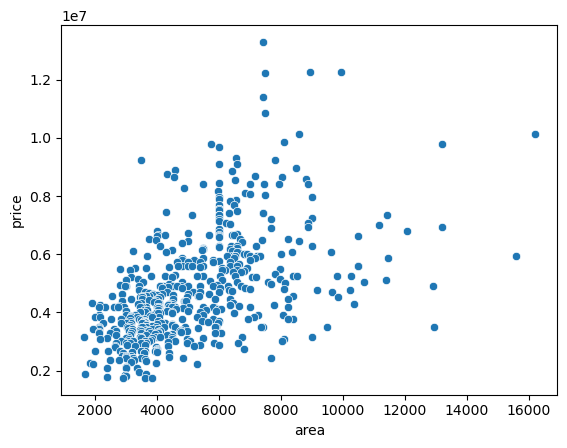

In [91]:
sns.scatterplot(data=df,x='area',y='price')
plt.show()

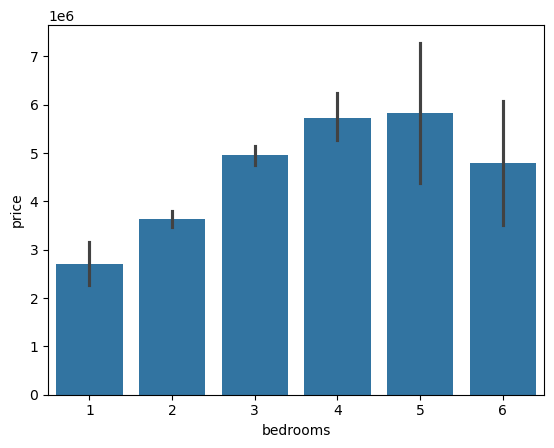

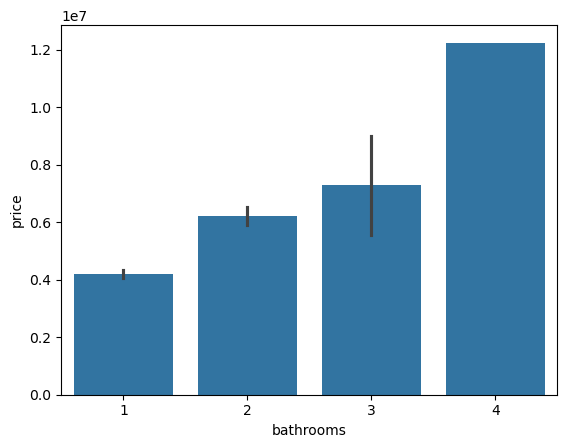

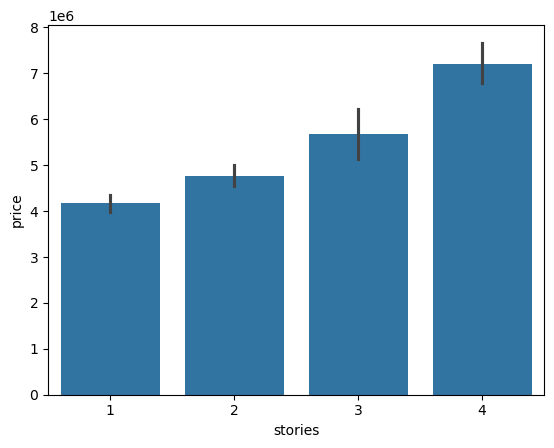

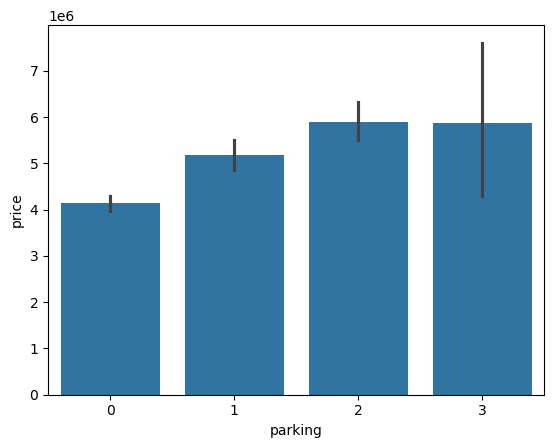

In [92]:
for i in ['bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.barplot(data=df,x=i,y='price')
    plt.show()

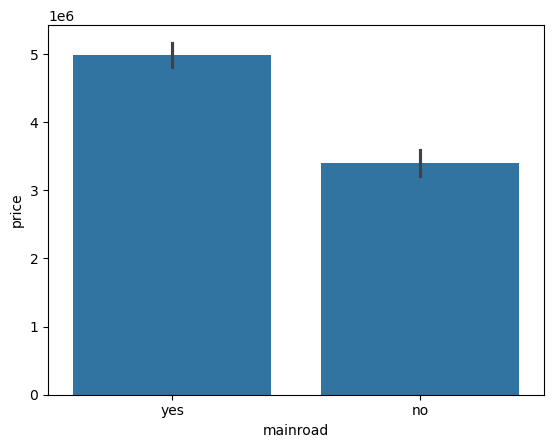

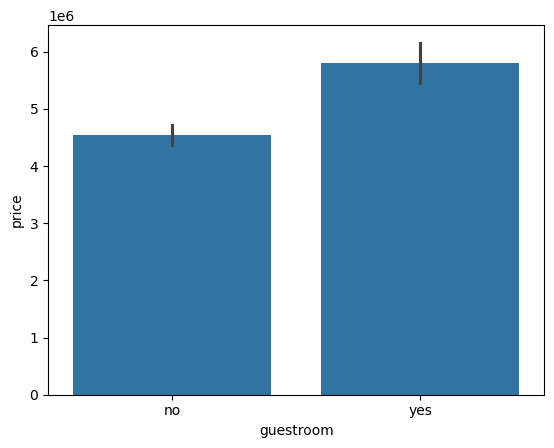

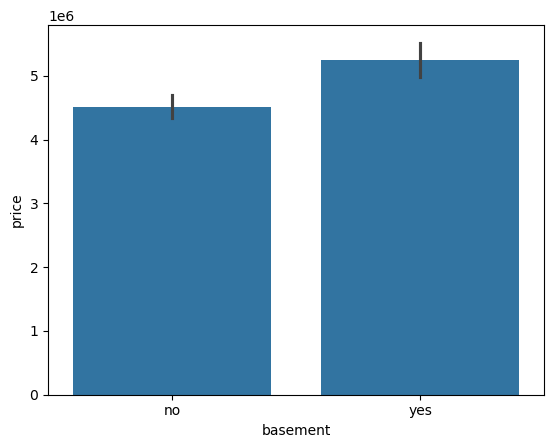

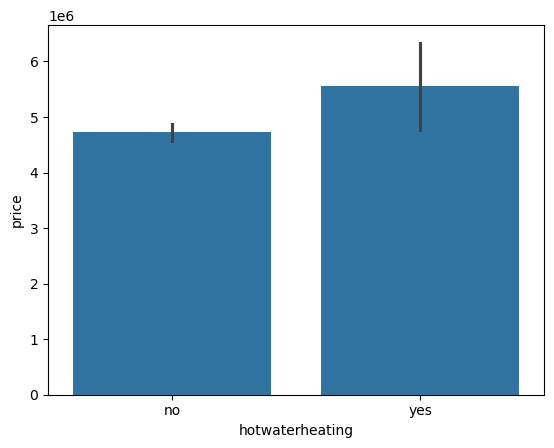

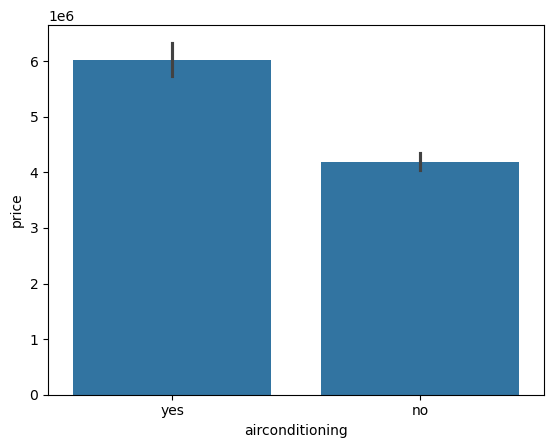

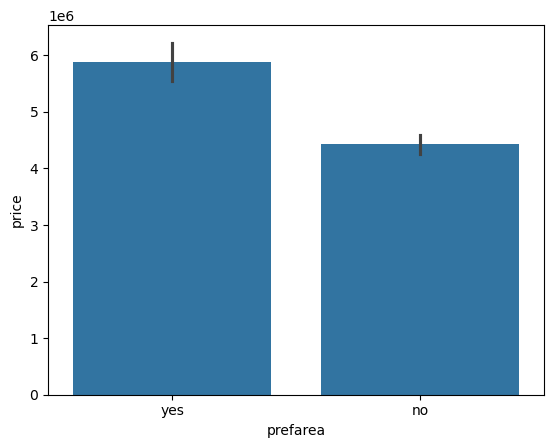

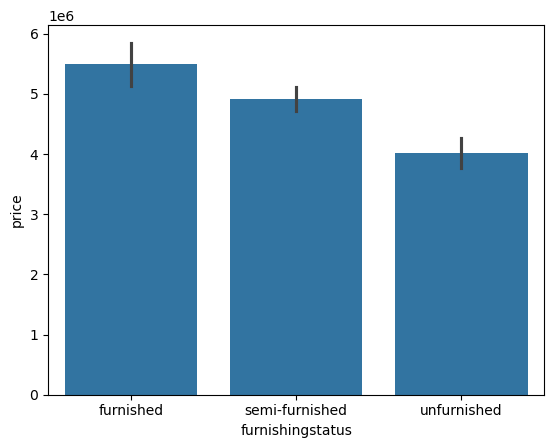

In [93]:
for i in df.select_dtypes(include='object').columns:
    sns.barplot(data=df,x=i,y='price')
    plt.show()

In [94]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] 

for feature in categorical_features:
    df[feature] = df[feature].map({'yes':1, 'no':0})

In [95]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [96]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [97]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})

In [98]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [99]:
X = df.drop(['price'], axis=1)
y_true = df['price']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

In [101]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,2
93,7200,3,2,1,1,0,1,0,1,3,0,1
335,3816,2,1,1,1,0,1,0,1,2,0,2
412,2610,3,1,2,1,0,1,0,0,0,1,0
471,3750,3,1,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,0
106,5450,4,2,1,1,0,1,0,1,0,1,1
270,4500,3,2,3,1,0,0,1,0,1,0,2
435,4040,2,1,1,1,0,0,0,0,0,0,0


In [102]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [103]:
lr_model = LinearRegression()

In [104]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [105]:
print(lr_model.coef_)
print(lr_model.intercept_)

[2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]
-127711.16739244387


In [106]:
y_train_pred = lr_model.predict(X_train)

In [107]:
print("Root Mean Squared Error: ", mean_squared_error(y_train, y_train_pred)**0.5)
print("R2 score: ", r2_score(y_train, y_train_pred))

Root Mean Squared Error:  984836.4426128389
R2 score:  0.6854429472843788


In [108]:
y_pred = lr_model.predict(X_test)

In [109]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred)**0.5)
print("R2 score: ", r2_score(y_test, y_pred))

Mean Squared Error:  1331071.4167895103
R2 score:  0.6494754192267804


In [110]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,0
77,6500,3,2,3,1,0,0,0,1,0,1,2
360,4040,2,1,1,1,0,0,0,0,0,0,1
90,5000,3,1,2,1,0,0,0,1,0,0,1
493,3960,3,1,1,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0,1
357,6930,4,1,2,0,0,0,0,0,1,0,2
39,6000,4,2,4,1,0,0,0,1,1,0,1
54,6000,3,2,2,1,1,0,0,1,1,0,1


In [111]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [112]:
Y_pred = lr_model.predict([[6100, 3, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2]])

Y_pred

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6409340.41089671])

In [113]:
df.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
441,3220000,4370,3,1,2,1,0,0,0,0,0,0,0


In [116]:
area = float(input('Enter Area in sq-ft:'))

beadrooms = int(input('Enter beadrooms:'))

bathrooms = int(input('Enter bathrooms: '))

stories = int(input("Enter stories: "))

mainroad = input("Do it have Main road [yes/no]: ")
mainroad = 1 if mainroad=='yes' else 0

guestroom = input("Do it have Guest room [yes/no]: ")
guestroom = 1 if guestroom=='yes' else 0

basement = input("Do it have Basement [yes/no]: ")
basement = 1 if basement=='yes' else 0

hotwaterheating = input("Do it have hot water [yes/no]: ")
hotwaterheating = 1 if hotwaterheating=='yes' else 0

airconditioning = input("Do it have airconditioning [yes/no]: ")
airconditioning = 1 if airconditioning=='yes' else 0

parking = input("Do it have parking:")
parking = 1 if parking == 'yes' else 0

prefarea = input("Do it have prefarea [yes/no]: ")
prefarea = 1 if prefarea=='yes' else 0

furnishing_status_mapping = {'furnished':2, 'semi-furnished':1, 'unfurnished':0}

furnishingstatus = input('Enter furnishing status: ')
furnishingstatus = furnishing_status_mapping[furnishingstatus]

price_pred = lr_model.predict([[area, beadrooms, bathrooms, stories,mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]])

print('Predicted price: ', price_pred[0])

Predicted price:  95560272.87095906


c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

In [115]:
joblib.dump(lr_model, 'housing_model.pkl')

['housing_model.pkl']